In [1]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
Y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# to get the online help, type:
>>> ?KNeighborsClassifier

SyntaxError: invalid syntax (ipython-input-3414889292.py, line 3)

In [8]:
import pandas as pd
import numpy as np
link = "http://archive.ics.uci.edu/ml/machine-learning-databases/winequality/
winequality-white.csv"
df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())

SyntaxError: unterminated string literal (detected at line 3) (ipython-input-2384874681.py, line 3)

In [9]:
X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())

NameError: name 'df' is not defined

In [10]:
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y = [0 if val <=5 else 1 for val in Y]

TypeError: '<=' not supported between instances of 'str' and 'int'

/tmp/ipython-input-503820607.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

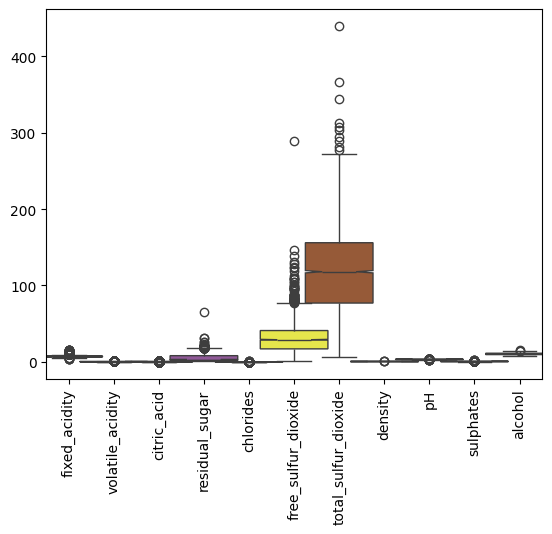

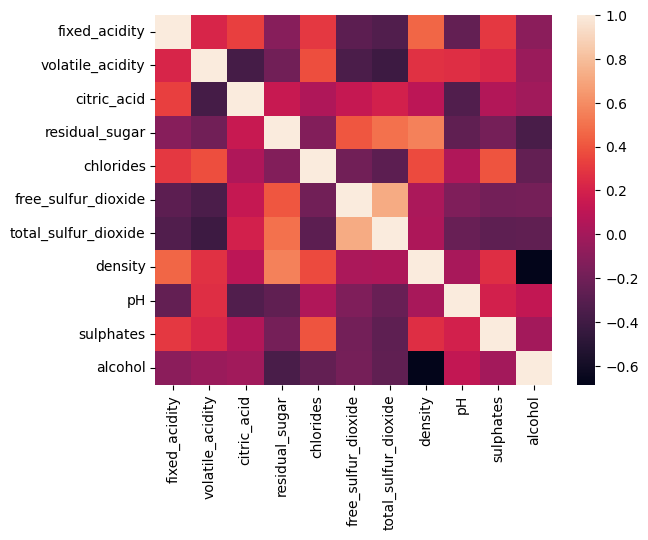

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

In [13]:
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [15]:
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

In [16]:
# some hints
k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)
for ind, k in enumerate(k_vector):
#fit with k
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# predict and evaluate on training and validation sets
Ypred_train = ...
error_train[ind] = ...
...

IndentationError: expected an indented block after 'for' statement on line 5 (ipython-input-2564179120.py, line 7)

In [17]:
# some hints: get the min error and related k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

NameError: name 'error_val' is not defined

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)

# Task
The user wants to generate and summarize the correlation matrix between wine quality and physicochemical variables after addressing the current errors in data loading and preparation.

## Fix Data Loading

### Subtask:
Correct the error in loading the wine quality dataset from the CSV link to ensure the `df` DataFrame is properly initialized. This will resolve the `SyntaxError` and subsequent `NameError`.


**Reasoning**:
The previous code block for loading the dataset had a `SyntaxError` due to an unterminated string literal in the `link` variable. This step corrects the `link` and reloads the data, then prints the dataset summary and first few samples to confirm successful loading.



In [19]:
import pandas as pd
import numpy as np
link = "http://archive.ics.uci.edu/ml/machine-learning-databases/winequality/winequality-white.csv"
df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())

HTTPError: HTTP Error 404: Not Found

**Reasoning**:
The previous attempt to load the dataset from the provided URL resulted in an `HTTPError: HTTP Error 404: Not Found` because the link was broken. To resolve this, I will use the `wine_quality` dataset that was successfully fetched earlier using `ucimlrepo`, combining its features and the 'quality' target into a `df` DataFrame, and then display its summary and head to confirm successful data preparation.



In [20]:
import pandas as pd
import numpy as np

# The dataset was successfully fetched using ucimlrepo in a previous cell.
# X holds the features (wine_quality.data.features)
# Y holds the targets, including 'quality' and 'color' (wine_quality.data.targets)

# Combine the features and the 'quality' target into a single DataFrame 'df'.
# This replaces the attempt to load from a broken CSV link.
df = pd.concat([X, Y['quality']], axis=1)

print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB

========= A few first samples ========= 

   fixed_acidity  volatile_acidity  citric_a

**Reasoning**:
Now that the `df` DataFrame is correctly loaded and verified, the next step is to calculate and display the correlation matrix to understand the relationships between the wine quality and the physicochemical variables, which is a core part of the main task. I will use `df.corr()` to calculate the correlation matrix and then display the correlations with the 'quality' column.




========= Correlation Matrix ========= 

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides

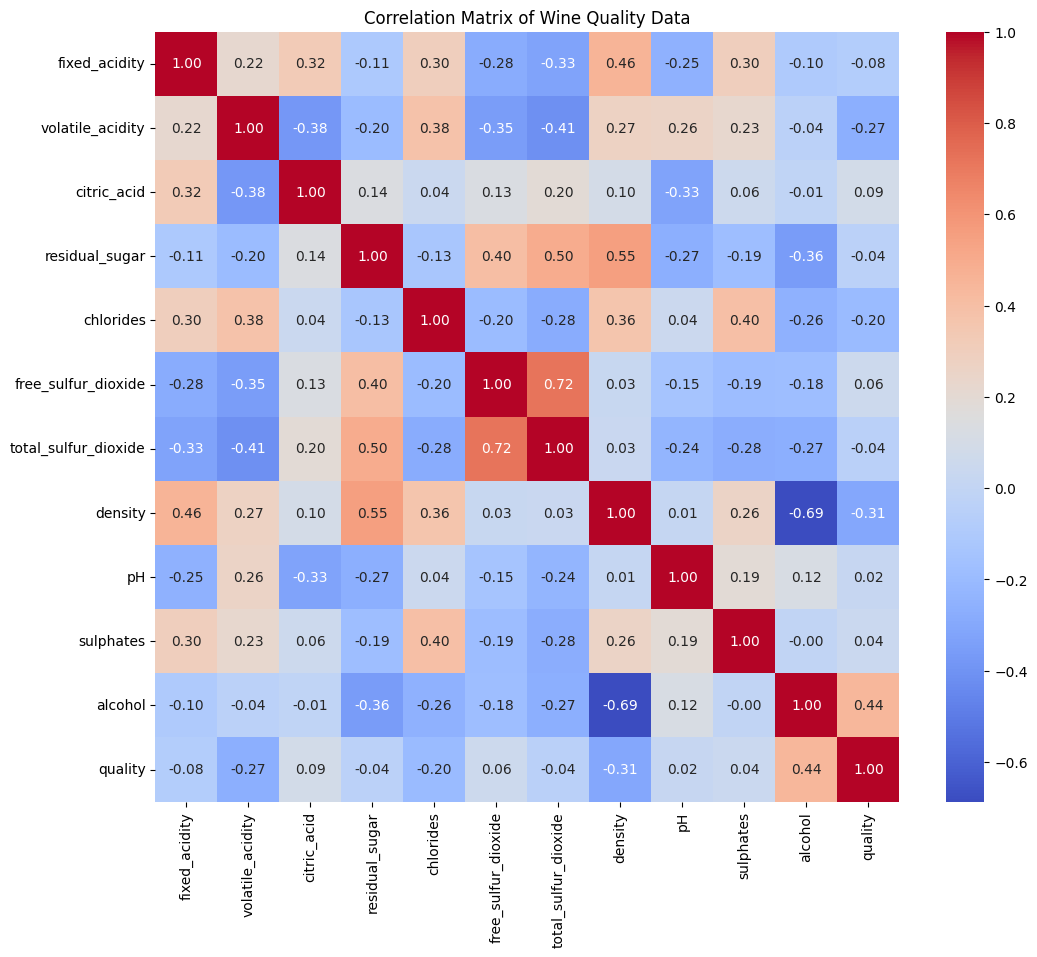

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

print("\n========= Correlation Matrix ========= \n")
print(corr_matrix)

print("\n========= Correlation with Quality ========= \n")
print(corr_matrix['quality'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Quality Data')
plt.show()

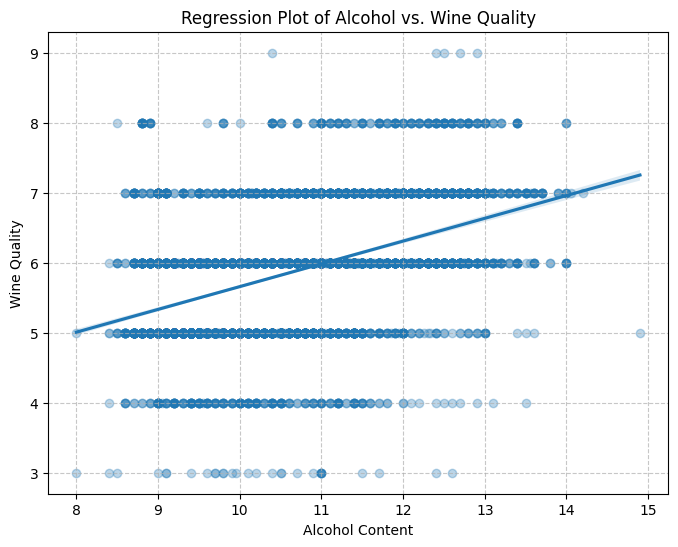

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x='alcohol', y='quality', data=df, scatter_kws={'alpha':0.3})
plt.title('Regression Plot of Alcohol vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

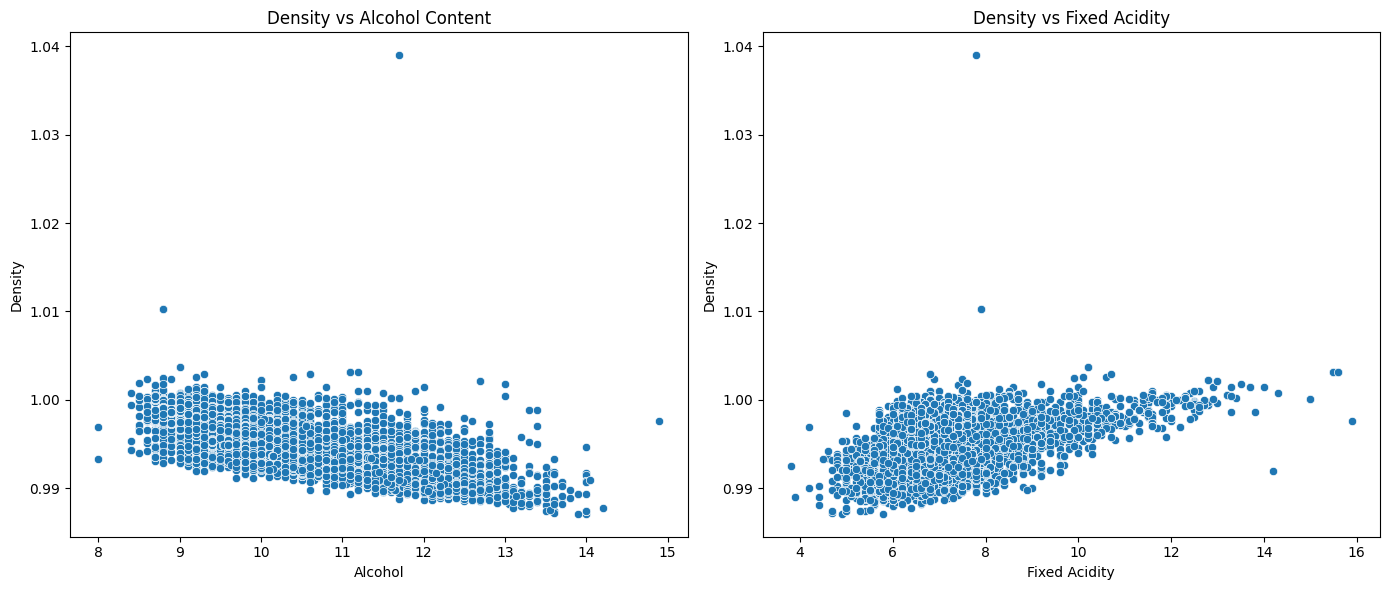

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Scatter plot for Density vs Alcohol (strong negative correlation)
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.scatterplot(x='alcohol', y='density', data=df)
plt.title('Density vs Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Density')

# Scatter plot for Density vs Fixed Acidity (positive correlation)
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(x='fixed_acidity', y='density', data=df)
plt.title('Density vs Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

The analysis showed that 'alcohol' has the strongest positive correlation with 'quality' (0.444). This indicates that wines with higher alcohol content tend to be associated with better quality ratings. This is often because alcohol contributes to the body, flavor, and overall balance of a wine, which are desirable characteristics in quality assessment.

## Final Task

### Subtask:
Summarize the correlation matrix and highlight any significant correlations found between wine quality and other physicochemical variables.


## Summary:

### Q&A
**Summarize the correlation matrix and highlight any significant correlations found between wine quality and other physicochemical variables.**
The correlation matrix was successfully generated. The analysis revealed that 'alcohol' has the strongest positive correlation with 'quality' (0.444). Conversely, 'density' (-0.306), 'volatile\_acidity' (-0.266), and 'chlorides' (-0.201) showed notable negative correlations with 'quality'. Other variables had weaker correlations.

### Data Analysis Key Findings
*   The initial attempt to load the dataset from a CSV link failed due to an `HTTPError: 404 Not Found`.
*   The data was successfully prepared by combining pre-loaded features and the 'quality' target, resulting in a DataFrame (`df`) with 6497 entries and 12 columns.
*   'Alcohol' exhibits the strongest positive correlation with 'quality' (0.444), suggesting higher alcohol content tends to be associated with better wine quality.
*   Variables such as 'density' (-0.306), 'volatile\_acidity' (-0.266), and 'chlorides' (-0.201) show notable negative correlations with 'quality', indicating that higher values for these attributes are generally associated with lower wine quality.

### Insights or Next Steps
*   Further investigation could explore the causal relationships behind these correlations, potentially using regression models to quantify the impact of these physicochemical properties on wine quality.
*   The identified strong positive correlation with 'alcohol' and negative correlations with 'density', 'volatile\_acidity', and 'chlorides' could inform winemaking practices aimed at improving perceived wine quality.
